# API

В этом проекта мы будем работать с 5 разными API:  

- API ЯндексМетрики,  
- API GoogleSheets,  
- API Telegram,  
- API VK 
- API The Metropolitan Museum of Art Collection

###API ЯндексМетрики

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import json
from io import BytesIO

In [29]:
# извлечем демо данные яндекс метрики и прочитаем их в формате json

url = 'https://api-metrika.yandex.net/stat/v1/data/bytime?date1=2018-01-01&date2=2018-01-14&group=day&dimensions=ym:s:operatingSystemRootName,ym:s:browserName&ids=44147844&accuracy=medium&metrics=ym:s:visits'
json_data = requests.get(url).json()
json_data

{'query': {'ids': [44147844],
  'dimensions': ['ym:s:operatingSystemRootName', 'ym:s:browserName'],
  'metrics': ['ym:s:visits'],
  'sort': ['-ym:s:visits'],
  'date1': '2018-01-01',
  'date2': '2018-01-14',
  'group': 'day',
  'auto_group_size': '1',
  'attr_name': '',
  'quantile': '50',
  'offline_window': '21',
  'attribution': 'LastSign',
  'currency': 'RUB',
  'adfox_event_id': '0',
  'auto_group_type': 'day'},
 'data': [{'dimensions': [{'name': 'Windows'}],
   'metrics': [[149.0,
     267.0,
     340.0,
     326.0,
     273.0,
     215.0,
     225.0,
     425.0,
     449.0,
     442.0,
     438.0,
     568.0,
     383.0,
     449.0]]},
  {'dimensions': [{'name': 'Mac OS'}],
   'metrics': [[22.0,
     90.0,
     89.0,
     88.0,
     87.0,
     44.0,
     38.0,
     113.0,
     124.0,
     126.0,
     144.0,
     130.0,
     53.0,
     54.0]]},
  {'dimensions': [{'name': 'Google Android'}],
   'metrics': [[20.0,
     26.0,
     52.0,
     42.0,
     37.0,
     40.0,
     41.0,
  

In [39]:
# теперь эти данные надо как-то разумно перевести в датафрейм

df = pd.DataFrame([(
                             i['dimensions'][0]['name'],
                             i['metrics'][0]) for i in json_data['data']], 
                           columns=['browser', 'metrics'])
df

,browser,metrics
0,Windows,"[149.0, 267.0, 340.0, 326.0, 273.0, 215.0, 225..."
1,Mac OS,"[22.0, 90.0, 89.0, 88.0, 87.0, 44.0, 38.0, 113..."
2,Google Android,"[20.0, 26.0, 52.0, 42.0, 37.0, 40.0, 41.0, 37...."
3,iOS,"[20.0, 14.0, 20.0, 31.0, 16.0, 20.0, 13.0, 22...."
4,GNU/Linux,"[10.0, 20.0, 15.0, 14.0, 16.0, 2.0, 8.0, 25.0,..."
5,Google Chrome OS,"[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."
6,Tizen,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ..."


Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика.

In [50]:
query = requests.get('https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv')
data = query.content
visits = pd.read_csv(BytesIO(data))

In [51]:
visits

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


In [53]:
visits_robots = visits.query('user_type == "Robots"')
visits_people = visits.query('user_type == "People"')

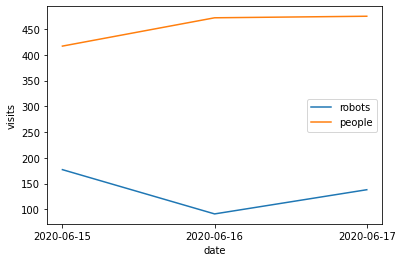

In [58]:
fig, ax = plt.subplots()
sns.lineplot(data = visits_robots,  x= 'date', y= 'visits', label = 'robots')
sns.lineplot(data = visits_people, x= 'date', y= 'visits', label = 'people')

Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome.

In [59]:
browsers = pd.read_csv('browsers.csv')
browsers

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [61]:
browsers['percent'] = round(browsers.visits / browsers.visits.sum() * 100, 0)
browsers

,date,browser,visits,percent
0,2020-06-15,Google Chrome,354.0,60.0
1,2020-06-15,Firefox,58.0,10.0
2,2020-06-15,Yandex Browser,54.0,9.0
3,2020-06-15,Safari,41.0,7.0
4,2020-06-15,Chrome Mobile,31.0,5.0
5,2020-06-15,Opera,16.0,3.0
6,2020-06-15,Mobile Safari,16.0,3.0
7,2020-06-15,Samsung Internet,9.0,2.0
8,2020-06-15,Edge,5.0,1.0
9,2020-06-15,UCWEB,4.0,1.0


Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?

In [74]:
visit_bot = pd.read_csv('visit_bot.csv')
visit_bot

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [69]:
visit_bot = (visit_bot.groupby(['browser', 'user_type'], as_index = False)
                         .agg({'visits': 'sum'})
)

In [70]:
visit_bot = visit_bot.pivot(index = 'browser', columns = 'user_type', values = 'visits').fillna(0).reset_index()
visit_bot

user_type,browser,People,Robots
0,Android Browser,1.0,0.0
1,Chrome Mobile,31.0,0.0
2,Chromium,1.0,1.0
3,CocCoc,1.0,0.0
4,Edge,4.0,1.0
5,Firefox,27.0,31.0
6,Google Chrome,250.0,104.0
7,Mobile Safari,15.0,1.0
8,Opera,11.0,5.0
9,Safari,19.0,22.0


In [72]:
visit_bot['proportion'] = visit_bot.Robots / (visit_bot.Robots + visit_bot.People)
visit_bot = visit_bot.sort_values('proportion', ascending = False)
visit_bot

user_type,browser,People,Robots,proportion
11,UCWEB,0.0,4.0,1.000000
9,Safari,19.0,22.0,0.536585
5,Firefox,27.0,31.0,0.534483
2,Chromium,1.0,1.0,0.500000
8,Opera,11.0,5.0,0.312500
6,Google Chrome,250.0,104.0,0.293785
4,Edge,4.0,1.0,0.200000
13,Yandex Browser,47.0,7.0,0.129630
10,Samsung Internet,8.0,1.0,0.111111
7,Mobile Safari,15.0,1.0,0.062500


In [7]:
user_info = pd.read_csv('user_info.csv')
user_info

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [6]:
user_info['proportion'] = round(user_info.visits / user_info.visits.sum() * 100, 2)
user_info

,date,browser,user_type,visits,proportion
0,2020-06-15,Google Chrome,People,250.0,42.09
1,2020-06-15,Google Chrome,Robots,104.0,17.51
2,2020-06-15,Yandex Browser,People,47.0,7.91
3,2020-06-15,Firefox,Robots,31.0,5.22
4,2020-06-15,Chrome Mobile,People,31.0,5.22
5,2020-06-15,Firefox,People,27.0,4.55
6,2020-06-15,Safari,Robots,22.0,3.70
7,2020-06-15,Safari,People,19.0,3.20
8,2020-06-15,Mobile Safari,People,15.0,2.53
9,2020-06-15,Opera,People,11.0,1.85


In [79]:
user_info.query('browser == "Safari" & user_type == "People"')

,date,browser,user_type,visits,proportion
7,2020-06-15,Safari,People,19.0,3.2


## API Google Sheets

In [131]:

import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import  ServiceAccountCredentials

In [154]:
# подлкючимся к API 

gc = gspread.service_account(filename='google_service_account.json')

In [155]:
# извлечем таблицу из GoogleSheets и загрузим ее в пандас датафрейм

travel_sheet = gc.open("Путешествие")
sheet1 = travel_sheet.sheet1
dataframe = pd.DataFrame(sheet1.get_all_records())

In [156]:
dataframe

,Кони,Люди
0,1,2
1,2,3
2,3,4


In [157]:
# Теперь создадим новую таблицу в ГуглДокументах

# Create empty table
sh = gs.create('User_info_3')

# Make it visible to others
sh.share('khodzitcky@gmail.com', perm_type='user', role='writer')

In [158]:
worksheet = sh.get_worksheet(0) # присвоим переменной worksheet нашу созданную таблицу

In [159]:
# при помощи метода update загрузим наш датафрейм в созданную таблицу
worksheet.update([user_info.columns.values.tolist()] + user_info.values.tolist()) 

{'spreadsheetId': '1QO1C8Rmp7zPWJV4zoUvYxV83XmD9YI1wyaRfNg3T0yo',
 'updatedRange': 'Sheet1!A1:E25',
 'updatedRows': 25,
 'updatedColumns': 5,
 'updatedCells': 125}

In [160]:
# Создадаим ссылку на нашу таблицу
spreadsheet_url = sh.url
spreadsheet_url

'https://docs.google.com/spreadsheets/d/1QO1C8Rmp7zPWJV4zoUvYxV83XmD9YI1wyaRfNg3T0yo'

### API Telegram

In [151]:
# Получившуюся ссылку отправим себе через бота в Telegram

from urllib.parse import urlencode #библиотека для кодировки параметров

token = '5770770414:AAE1E-iHzDhN7QyiGTaYlfuMl5FT3PHa8Uo' # Токен получен от BotFather
chat_id = 571346354 # chat id получили через /updates
message =  spreadsheet_url # отправляем полученную ссылку на гугл таблицу

params = {'chat_id': chat_id, 'text': message}

API_pattern = f'https://api.telegram.org/bot{token}/' # стандартный паттерн для обращения к боту телеграм

final_url = API_pattern + 'sendMessage?' + urlencode(params)

resp = requests.get(final_url)

### API VK

In [153]:
# Также отправим эту ссылку себе в ВК

import vk_api


token = 'vk1.a.X0inz_ps5ziKrYgwmL_PlF1Sh3irrxGVqvCrlfN20obB68ONwfDmOIVCKFG6mdB1anSg9tNCZssgRn5tZQWIKrl-8v55gdm5ypgMoyRqyPaK9qQNKowrGU-pYfMiiuxun9DiKkjORudlG0KAkWLMI8XELHnFCcujfA6JRC6kBcWWFXdRRpPWLtC35yNh0qNO'

In [161]:
vk_session = vk_api.VkApi(token=token)
vk = vk_session.get_api()


vk.messages.send(
    chat_id=1, 
    random_id=np.random.randint(1, 2 ** 31), 
    message= spreadsheet_url)

11

In [4]:
# Задача: прочитать дополнительные данные из Google SpreadSheet

r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))
df

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [30]:
# соединим новый и старый датафрейм и посчитаем соотношение visits/users

full_df = df.merge(user_info)

full_df

,date,browser,user_type,users,visits
0,2020-06-15,Google Chrome,People,240.0,250.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0
2,2020-06-15,Yandex Browser,People,44.0,47.0
3,2020-06-15,Chrome Mobile,People,30.0,31.0
4,2020-06-15,Firefox,Robots,29.0,31.0
5,2020-06-15,Firefox,People,26.0,27.0
6,2020-06-15,Safari,Robots,20.0,22.0
7,2020-06-15,Safari,People,17.0,19.0
8,2020-06-15,Mobile Safari,People,14.0,15.0
9,2020-06-15,Opera,People,10.0,11.0


In [31]:
full_df['proportion'] = full_df.users / full_df.visits
full_df

,date,browser,user_type,users,visits,proportion
0,2020-06-15,Google Chrome,People,240.0,250.0,0.960000
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.000000
2,2020-06-15,Yandex Browser,People,44.0,47.0,0.936170
3,2020-06-15,Chrome Mobile,People,30.0,31.0,0.967742
4,2020-06-15,Firefox,Robots,29.0,31.0,0.935484
5,2020-06-15,Firefox,People,26.0,27.0,0.962963
6,2020-06-15,Safari,Robots,20.0,22.0,0.909091
7,2020-06-15,Safari,People,17.0,19.0,0.894737
8,2020-06-15,Mobile Safari,People,14.0,15.0,0.933333
9,2020-06-15,Opera,People,10.0,11.0,0.909091


In [36]:
full_df.pivot(index='browser', columns='user_type', values='proportion')

user_type,People,Robots
browser,,
Android Browser,1.000000,NaN
Chrome Mobile,0.967742,NaN
Chromium,1.000000,1.000000
CocCoc,1.000000,NaN
Edge,1.000000,1.000000
Firefox,0.962963,0.935484
Google Chrome,0.960000,1.000000
Mobile Safari,0.933333,1.000000
Opera,0.909091,1.000000


# API от The Metropolitan Museum of Art Collection 

In [3]:

# поработаем с открытым API от The Metropolitan Museum of Art Collection 

# создадим запрос на поиск произведений, в описании которых есть слово 'sunflower'
r = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?q=sunflower')
res = r.json()
res

{'total': 87,
 'objectIDs': [485308,
  707887,
  437112,
  436524,
  363282,
  360837,
  210191,
  11922,
  2032,
  400581,
  367817,
  20141,
  2019,
  480725,
  208554,
  347980,
  486590,
  207869,
  761604,
  437115,
  375281,
  705155,
  484935,
  423400,
  343052,
  223828,
  682927,
  57922,
  649813,
  79739,
  193938,
  339347,
  626832,
  208218,
  202228,
  437984,
  436534,
  704667,
  696949,
  437329,
  436252,
  436580,
  207753,
  822570,
  487043,
  816522,
  437526,
  203893,
  367434,
  190739,
  431264,
  423237,
  397949,
  262423,
  403496,
  13644,
  656530,
  18362,
  820022,
  664519,
  648617,
  761731,
  814626,
  892559,
  207967,
  262430,
  262428,
  839296,
  707697,
  205386,
  262378,
  426804,
  633526,
  369073,
  747779,
  852414,
  427872,
  436530,
  436535,
  436529,
  436121,
  724844,
  436144,
  437980,
  834585,
  834580,
  834765]}

In [4]:
# организуем полученные id в список
res_lst = res['objectIDs']

In [5]:
for i in [436524, 2032, 437329, 20149, 16822570]:
    if i in res_lst:
        print(i)

436524
2032
437329


In [6]:
r = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/436524')
res = r.json()
res

{'objectID': 436524,
 'isHighlight': False,
 'accessionNumber': '49.41',
 'accessionYear': '1949',
 'isPublicDomain': True,
 'primaryImage': 'https://images.metmuseum.org/CRDImages/ep/original/DP229743.jpg',
 'primaryImageSmall': 'https://images.metmuseum.org/CRDImages/ep/web-large/DP229743.jpg',
 'additionalImages': [],
 'constituents': [{'constituentID': 161947,
   'role': 'Artist',
   'name': 'Vincent van Gogh',
   'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500115588',
   'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q5582',
   'gender': ''}],
 'department': 'European Paintings',
 'objectName': 'Painting',
 'title': 'Sunflowers',
 'culture': '',
 'period': '',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': 'Artist',
 'artistPrefix': '',
 'artistDisplayName': 'Vincent van Gogh',
 'artistDisplayBio': 'Dutch, Zundert 1853–1890 Auvers-sur-Oise',
 'artistSuffix': '',
 'artistAlphaSort': 'Gogh, Vincent van',
 'artistNationality': 'Dutch',
 'artist

In [ ]:
# с помощью цикла считаем информацию об объектах, имеющих в описании sunflower и оформим эту информацию в датафрейм

dictionary = {}
values = ['objectID', 'title']
concat_df = pd.DataFrame()

for i in res_lst:
    r = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{i}').json()
    dictionary = {k: v for k, v in r.items() if k in values}
    small_df = pd.DataFrame(dictionary)
    concat_df = concat_df.append(small_df)